<h1>Rectangular and circular Waveguides: modes and Fco Calculator</h1>

<p style="text-align: justify; text-indent:4em"> 
In communication engineering and electromagnetism, <b>waveguides</b> are structures that direct / conveys electromagnetic waves. They are, in short, a hollow metal filled with a dielectric, commonly the air. In general, they have a rectangular or circular shape.
</p>

<img src="static/basic_waveguides.jpg">

<p style="text-align: justify; text-indent:4em">  The lower cutoff frequency (or wavelength) for a particular mode in rectangular waveguide is determined by the following equations: 
</p>

\begin{align*} 
(f_c)_{mn} = \frac{1} {2 \pi \sqrt{\epsilon  \mu}\ }\ \sqrt{ \left ( \frac{m . \pi}{a} \right )^2 + \left ( \frac{n . \pi}{b} \right )^2  }\ \left [ Hz \right ]	
\end{align*}

\begin{align*} 
(\lambda_c)_{mn} = \frac{2} { \sqrt{ \left ( \frac{m}{a} \right )^2 + \left ( \frac{n}{b} \right )^2 }\ } \left [ meters \right ]	
\end{align*}

<img src="static/rectangular_waveguide.jpg">

In [11]:
# -*- coding: utf-8 -*-

import math

class RectangularWaveGuide():

    def __init__(self, a: float=None, b: float=None, E: float=8.854187816999999*math.pow(10, -12), 
                 U: float=1.2566370614359173 * math.pow(10, -6), S: float=299792458.011):
        """
        Constructor Class
        :param a: Inside width (m), longest dimension
        :param b: Inside height (m), shortest dimension
        :param E: Permittivity
        :param U: Permeability
        :param S: Speed propagation
        """
        self.a = a
        self.b = b
        self.E = E
        self.U = U
        self.S = S
           

    def setE(self, E):
        """
        Set the Permittivity
        :param E: Permittivity
        """
        self.E = E

    def setU(self, U):
        """
        Set the Permeability
        :param U: Permeability
        """
        self.U = U

    def calcS(self):
        """
        calculate speed
        """
        self.S = 1 / math.sqrt(self.U * self.E)

    def findCutOff(self, m, n):
        """
        find the lower cutoff frequency (or wavelength) for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        cf = (self.S/(2 * math.pi)) * math.sqrt(
            math.pow(( (m * math.pi) / self.a ), 2) + math.pow(( (n * math.pi) / self.b ), 2)
        )
        return cf

[[  0.00000000e+00   2.07785180e+09   4.15570360e+09   6.23355541e+09]
 [  4.40353199e+09   4.86914388e+09   6.05483001e+09   7.63205785e+09]
 [  8.80706398e+09   9.04885872e+09   9.73828776e+09   1.07898836e+10]
 [  1.32105960e+10   1.33730069e+10   1.38488165e+10   1.46074316e+10]]


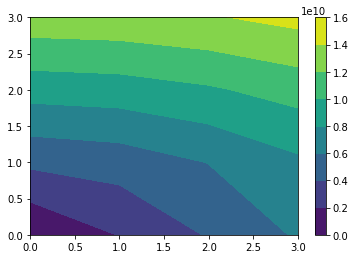

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 

len_m = 4
len_n = 4

m,n = np.meshgrid(np.arange(len_m), np.arange(len_n))
cf = np.empty((len_m, len_n))
guia = RectangularWaveGuide(a=0.07214, b=0.03404)

for i in range(len_m):
    for j in range(len_n):
        cf[i][j] = guia.findCutOff(m[i][j], n[i][j])
        
print(cf)

fig = plt.figure()
plt.contourf(m, n, cf)
plt.colorbar()

plt.show()

1.2566370614359173e-06